# EDA + Preprocess + X Y splitting

## Import and Dataset

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [93]:
df = pd.read_csv('GPA.csv')

## EDA + Preprocessing by filling Na's

In [94]:
df.shape

(125, 8)

In [95]:
df.head()

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.0,P,3,20.0,78
1,CS,F,7,82.0,P,4,22.0,73
2,CS,F,4,81.0,P,3,20.0,80
3,CS,M,3,NaN,P,3,22.0,67
4,CS,M,3,NaN,P,3,22.0,67


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       125 non-null    object 
 1   Gender     123 non-null    object 
 2   St_Hr      125 non-null    int64  
 3   School_AV  121 non-null    float64
 4   branch     125 non-null    object 
 5   level      125 non-null    int64  
 6   Age        117 non-null    float64
 7   GPA        125 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 7.9+ KB


In [97]:
df.describe()

,St_Hr,School_AV,level,Age,GPA
count,125.00000,121.000000,125.000000,117.000000,125.000000
mean,4.94400,72.842975,2.840000,21.213675,80.904000
std,1.17983,8.439005,0.928057,1.530320,6.775697
min,3.00000,54.000000,1.000000,18.000000,60.000000
25%,4.00000,66.000000,2.000000,20.000000,77.000000
50%,5.00000,74.000000,3.000000,21.000000,82.000000
75%,6.00000,80.000000,3.000000,22.000000,86.000000
max,7.00000,90.000000,6.000000,25.000000,93.000000


In [98]:
# Check duplicates
df.duplicated().sum()

np.int64(5)

In [99]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [100]:
# Count Na values
df.isnull().sum()

Spec         0
Gender       2
St_Hr        0
School_AV    2
branch       0
level        0
Age          8
GPA          0
dtype: int64

In [101]:
# Fill the age with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['School_AV'].fillna(df['School_AV'].mean(), inplace=True)

/var/folders/w5/q_mfmfp557q99f_5j1v21c_40000gn/T/ipykernel_12829/2201442560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/w5/q_mfmfp557q99f_5j1v21c_40000gn/T/ipykernel_12829/2201442560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [102]:
# Encode Gender before filling Na values
le = LabelEncoder()

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

# Fill the Na values with the mean
df['Gender'].fillna(df['Gender'].mean(), inplace=True)

/var/folders/w5/q_mfmfp557q99f_5j1v21c_40000gn/T/ipykernel_12829/666060405.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mean(), inplace=True)


In [103]:
df.isna().sum()

Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        0
Age          0
GPA          0
dtype: int64

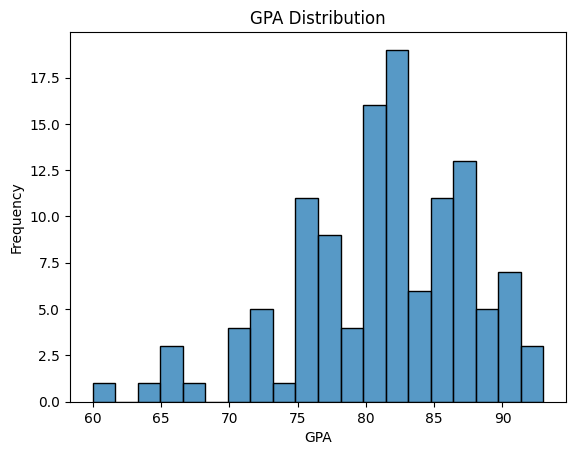

In [104]:
sns.histplot(df['GPA'], bins=20)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       120 non-null    object 
 1   Gender     120 non-null    int64  
 2   St_Hr      120 non-null    int64  
 3   School_AV  120 non-null    float64
 4   branch     120 non-null    object 
 5   level      120 non-null    int64  
 6   Age        120 non-null    float64
 7   GPA        120 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 8.4+ KB


In [106]:
# Convert categorical variables to numerical
le = LabelEncoder()
le.fit(df['Spec'])
df['Spec'] = le.transform(df['Spec'])
le.fit(df['branch'])
df['branch'] = le.transform(df['branch'])


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       120 non-null    int64  
 1   Gender     120 non-null    int64  
 2   St_Hr      120 non-null    int64  
 3   School_AV  120 non-null    float64
 4   branch     120 non-null    int64  
 5   level      120 non-null    int64  
 6   Age        120 non-null    float64
 7   GPA        120 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 8.4 KB


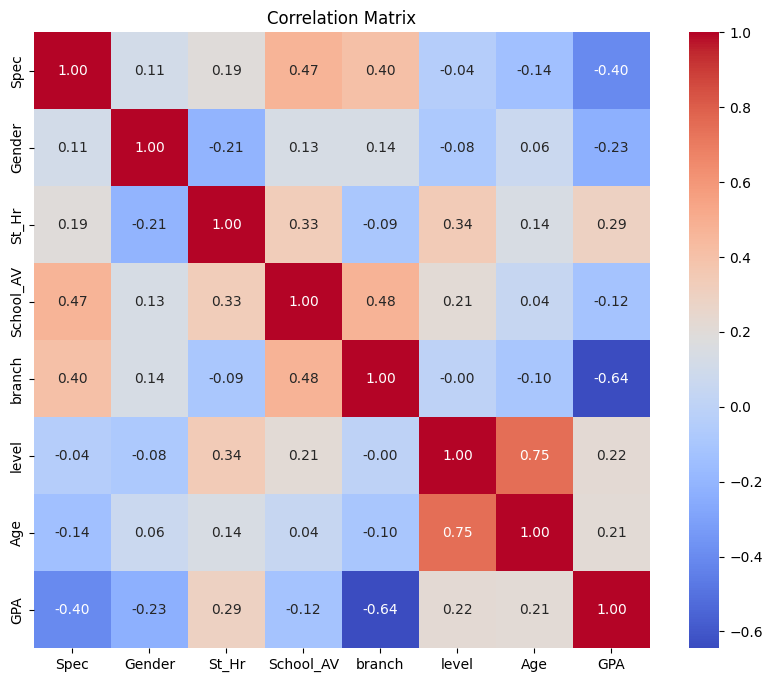

In [108]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [109]:
# Detect outliers using the IQR method
Q1 = df.quantile(0.25)  # First quartile
Q3 = df.quantile(0.75)  # Third quartile
IQR = Q3 - Q1           # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Outliers detected in each column:")
print(outliers)

Outliers detected in each column:
Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        3
Age          0
GPA          1
dtype: int64


In [110]:
# Check the outlier in level and GPA
outliers_level = df[(df < lower_bound['level']) | (df > upper_bound['level'])]
print("Outliers in level:")
print(outliers_level)
# Check the outlier in GPA
outliers_gpa = df[(df < lower_bound['GPA']) | (df > upper_bound['GPA'])]
print("Outliers in GPA:")  
print(outliers_gpa)

Outliers in level:
     Spec  Gender  St_Hr  School_AV  branch  level   Age  GPA
0     NaN     0.0    6.0  80.000000     NaN    NaN  20.0   78
1     NaN     0.0    7.0  82.000000     NaN    NaN  22.0   73
2     NaN     0.0    NaN  81.000000     NaN    NaN  20.0   80
3     NaN     NaN    NaN  72.923729     NaN    NaN  22.0   67
5     NaN     0.0    6.0  80.000000     NaN    NaN  19.0   77
..    ...     ...    ...        ...     ...    ...   ...  ...
120   NaN     NaN    5.0  88.000000     NaN    NaN  21.0   83
121   NaN     0.0    6.0  79.000000     0.0    NaN  23.0   88
122   NaN     NaN    NaN  77.000000     0.0    NaN  20.0   86
123   0.0     NaN    6.0  82.000000     0.0    NaN  24.0   93
124   NaN     0.0    7.0  90.000000     NaN    5.0  23.0   87

[120 rows x 8 columns]
Outliers in GPA:
     Spec  Gender  St_Hr  School_AV  branch  level   Age  GPA
0       2       0      6        NaN       1      3  20.0  NaN
1       2       0      7        NaN       1      4  22.0  NaN
2       2 

In [111]:
# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (116, 8)


## Preprocessing + Training

In [112]:
df.isna().sum()

Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        0
Age          0
GPA          0
dtype: int64

In [113]:
## Train-test split
X = df.drop('GPA', axis=1)
y = df['GPA']


# Model 1

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (92, 7)
Test set shape: (24, 7)


In [115]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

Predictions: [73.79343254 78.70129351 73.95543657 75.72112538 83.17203555 75.44715802
 87.16029779 73.45688115 80.58910611 82.96188294 84.46101626 84.40632092
 87.55407839 71.55670168 72.45980137 79.12824983 83.01047447 84.59747886
 84.98917226 88.74264752 83.23666572 83.71999761 86.76015498 75.3329301 ]
Actual values: [76 77 70 65 84 77 91 75 81 85 86 82 89 75 75 78 84 86 89 90 84 90 88 81]
Coefficients: [-1.98328062 -0.86258912  0.90309969  0.19867787 -7.46345069  0.48407029
 -0.05711396]
Intercept: 68.93550191632843
Mean squared error: 11.958949257356869
R^2 score: 0.7332163140109389


## Model Evaluation + Export

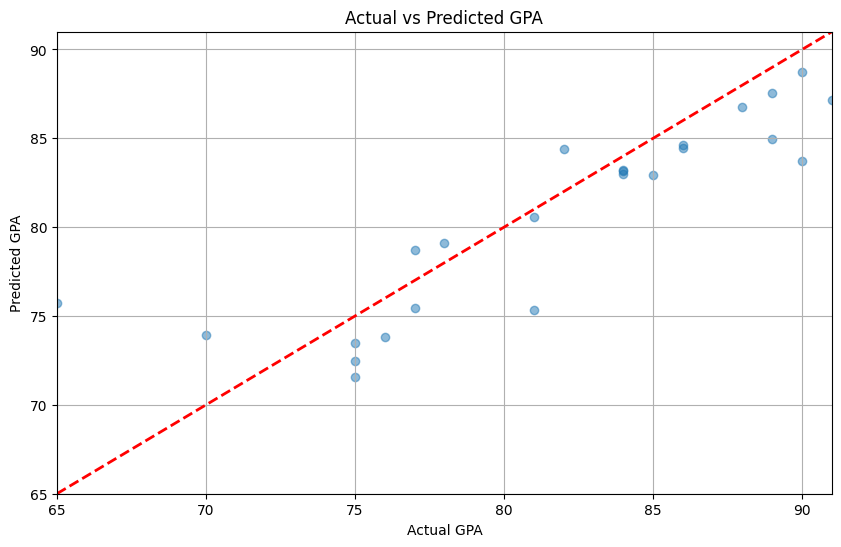

In [116]:
#Evaluate the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

In [117]:
# Export the model
import joblib
joblib.dump(model, 'gpa_model_1.pkl')

['gpa_model_1.pkl']

Model 1 uses a classic linear regression approach, where the model is trained using all available features in the dataset to predict the GPA. The features include specialization (Spec), gender, study hours (St_Hr), school average (School_AV), branch, academic level, and age. Before training, the data is split into training and testing sets to evaluate the model’s performance on unseen data.

By including all features, the model attempts to capture as much information as possible about the factors that might influence a student's GPA. This approach can be beneficial if all features are relevant and there is enough data to support the complexity. However, using all features can sometimes introduce noise or irrelevant information, especially if some features are weakly correlated with GPA or contain missing values. This can lead to overfitting, where the model performs well on the training data but less well on new, unseen data.

After training, the model’s predictions are compared to the actual GPA values in the test set. The mean squared error (MSE) and R² score are calculated to assess the model’s accuracy and how well it explains the variance in GPA. The model is then saved for future use. This approach provides a baseline for comparison with more refined models that use feature selection or regularization.

# Model 2

In [118]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Coefficients:", best_ridge.coef_)
print("Intercept:", best_ridge.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

joblib.dump(best_ridge, 'gpa_model_2.pkl')
joblib.dump(poly, 'poly_transform.pkl')
joblib.dump(scaler, 'scaler.pkl')

Predictions: [73.43011115 75.70797846 74.33819336 74.18238969 84.5836659  79.82564921
 83.58835074 75.72491508 82.95886605 85.77919728 85.37175352 83.24784377
 82.0636836  72.05479163 73.70092139 77.59121303 81.11533104 84.82769262
 87.66135817 85.29696078 82.8379437  82.67091267 92.4117539  78.25058867]
Actual values: [76 77 70 65 84 77 91 75 81 85 86 82 89 75 75 78 84 86 89 90 84 90 88 81]
Coefficients: [-2.64817259 -1.98328789  1.59239826 -2.11855463 -1.84650024 -0.39881182
 -0.5101709   6.52778503 -2.39005509 -1.27899578 -2.34701294 -1.30625915
  0.94467296 -1.59906975  0.32745468  4.22410915  0.46359333 -0.01319206
  1.10604509 -2.12580465 -2.41611538 -0.05791788 -1.29158449 -0.35723903
  1.79445826  3.05474624 -0.351398    2.04637611 -0.14492799 -1.84650024
  3.20172752 -0.03824822 -1.25908287 -0.46948159 -0.71575653]
Intercept: 81.10536263281237
Mean squared error: 14.830221194528159
R^2 score: 0.6691631522831828


['scaler.pkl']

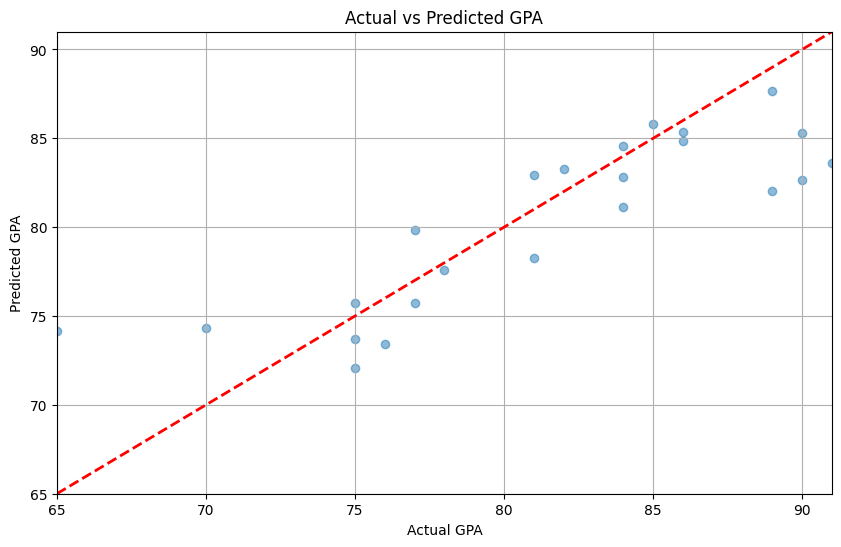

In [119]:
#Evaluate the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

Model 2 uses Ridge Regression, which is a regularized version of linear regression, combined with polynomial feature expansion. In this approach, all features are first transformed into polynomial features of degree 2, allowing the model to capture more complex, non-linear relationships between the input variables and GPA. After this transformation, the features are scaled to ensure they are on the same scale, and then Ridge Regression is applied. Ridge Regression helps prevent overfitting by adding a penalty to large coefficient values, making the model more robust, especially when dealing with multicollinearity or many features.

Despite these enhancements, Model 2 often produces a lower R² score compared to Model 1. This can happen for several reasons. First, polynomial feature expansion greatly increases the number of features, which can be problematic with a relatively small dataset, leading to overfitting or instability in the model. Second, if the underlying relationship between the features and GPA is mostly linear, adding polynomial terms may introduce unnecessary complexity and noise, reducing the model’s ability to generalize. Finally, the regularization in Ridge Regression, while helpful for controlling overfitting, can also shrink important coefficients too much if not tuned properly, further lowering the model’s explanatory power. As a result, Model 2 may not perform as well as the simpler Model 1 on this particular dataset.

# Model 3 (Best Model)

In [120]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Predictions: [78.01759  73.307175 72.79794  73.348076 83.19108  78.91115  85.665344
 76.318245 80.22776  83.395905 85.14821  83.42194  84.310524 72.82825
 74.748375 76.54922  82.209816 83.980835 84.87163  85.437965 83.97968
 84.91767  86.337166 78.756195]
Actual values: [76 77 70 65 84 77 91 75 81 85 86 82 89 75 75 78 84 86 89 90 84 90 88 81]
Mean squared error: 10.137081146240234
R^2 score: 0.7738590836524963


In [121]:
joblib.dump(best_xgb, 'best_model.pkl')
joblib.dump(scaler, 'scaler_best.pkl')
joblib.dump(poly, 'poly_transform_best.pkl')

['poly_transform_best.pkl']

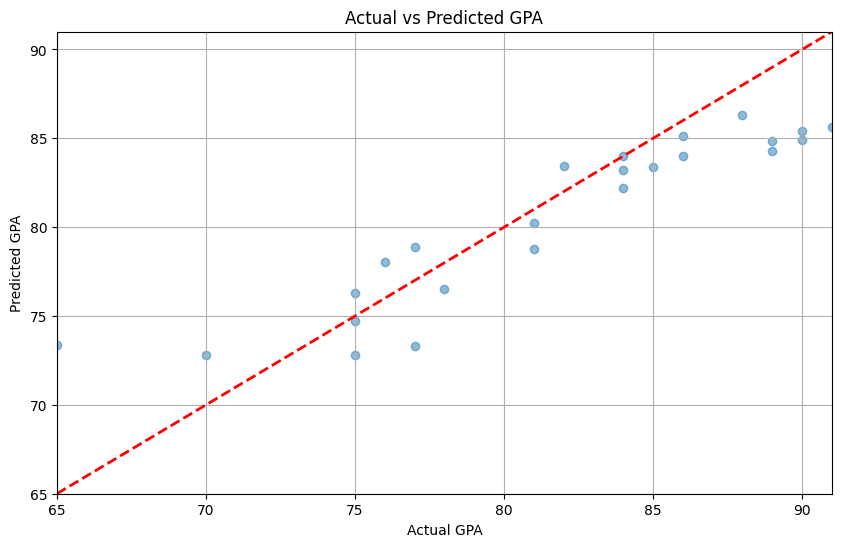

In [122]:
#Evaluate the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

Model 3 uses the XGBoost regression algorithm, which is a powerful and flexible machine learning method based on gradient boosting. In this approach, the model is trained using all available features, and a grid search is performed to find the best combination of hyperparameters such as the number of estimators, learning rate, maximum tree depth, and subsample ratio. This tuning process helps the model achieve optimal performance for the given dataset.

XGBoost is well-suited for handling complex, non-linear relationships and can automatically manage feature interactions and missing values. It is also robust to overfitting due to its built-in regularization techniques. By leveraging grid search and cross-validation, Model 3 is able to find the best settings for the data, resulting in improved predictive accuracy.

This model is considered the best because it consistently achieves a higher R² score and lower mean squared error compared to the simpler linear and ridge regression models. Its ability to capture complex patterns in the data, combined with careful hyperparameter tuning, allows it to generalize better to unseen data. As a result, Model 3 provides the most reliable and accurate GPA predictions among all the models tested.

# Model 4

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

selected_features = ['branch', 'School_AV', 'Gender', 'St_Hr']
X_selected = df[selected_features]
y = df['GPA']

scaler_selected = StandardScaler()
X_selected_scaled = scaler_selected.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

model_selected = LinearRegression()
model_selected.fit(X_train, y_train)

y_pred = model_selected.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

joblib.dump(model_selected, 'model_selected.pkl')
joblib.dump(scaler_selected, 'scaler_selected.pkl')

Predictions: [76.08594637 78.73868808 75.28835826 77.0734381  87.01895339 77.53797622
 86.28277965 75.31764291 79.02198197 86.37332485 87.46302005 84.95057966
 86.48434152 74.55218451 75.30882972 78.73868808 83.16549982 86.56607354
 87.21170207 86.04027486 83.49854982 84.81909154 84.90082355 77.53797622]
Actual values: [76 77 70 65 84 77 91 75 81 85 86 82 89 75 75 78 84 86 89 90 84 90 88 81]
Mean squared error: 12.53811223922532
R^2 score: 0.7202961793263445


['scaler_selected.pkl']

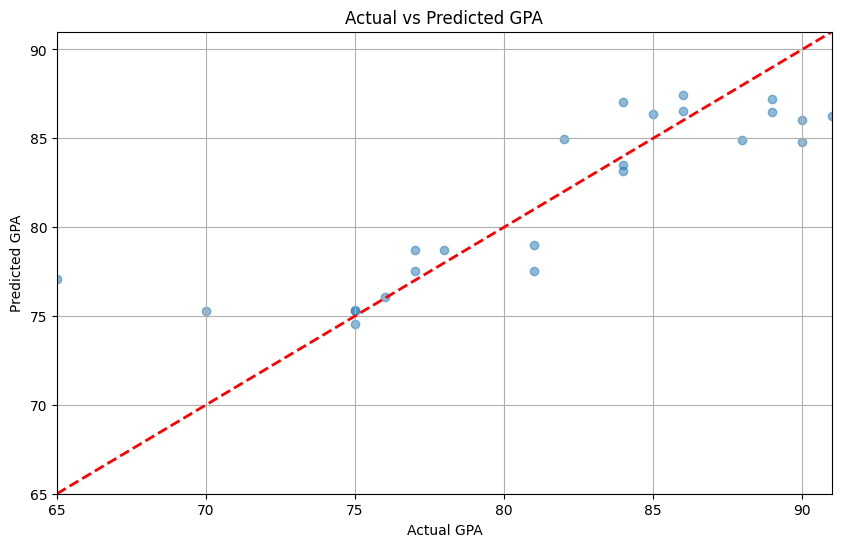

In [124]:
#Evaluate the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

Model 4 uses a linear regression model but only with a subset of the most relevant features: branch, School_AV, Gender, and St_Hr. These features were chosen based on their strong correlation with GPA, as identified during exploratory data analysis. Before training, these features are scaled to ensure they are on the same scale, which helps the model learn more effectively. The model is then trained and evaluated using a train-test split, and the results show an R² score of around 0.72.

This model is good because it simplifies the prediction process by focusing only on the features that have the most significant impact on GPA. By removing less relevant or noisy features, the model can generalize better and is less likely to overfit, especially with a relatively small dataset. The R² score of 0.72 indicates that the model explains a substantial portion of the variance in GPA, making it a strong and interpretable choice.

However, the R² score is still lower than that of the XGBoost model and even lower than the regular linear regression model that uses all features. This is because, while dropping irrelevant features can reduce noise, it can also remove some information that might be useful for prediction. The XGBoost model, in particular, is able to capture complex, non-linear relationships and interactions between all features, which allows it to achieve higher accuracy. Similarly, the full linear regression model may benefit from additional information present in the dropped features, even if their individual correlations with GPA are weaker. As a result, Model 4 offers a good balance between simplicity and performance, but it cannot match the predictive power of more complex models that utilize the full feature set.